# Nonlinear oscillator coupled to a chain of linear oscillators

We want to solve a system for a nonlinear oscillator coupled to an infinite chain of linear oscillators. At first, lets start with a following system for 100 oscillators:
$$
\begin{cases}
M\ddot x_1 + k x_1 - k x_2 = F(x,t)
\\
m\ddot x_j + 2k x_j - k x_{j-1} - k x_{j+1} = 0, j=2,..,99
\\
m\ddot x_{100} + 2 k x_{100} - k x_{99} = 0
\end{cases}
$$

After nondimensionalization we get:
$$
\begin{cases}
\ddot X_1 + X_1 - X_2 = f
\\
\ddot X_j + \frac{q^2}{2} X_j - \frac{q^2}{4} X_{j-1} - \frac{q^2}{4} X_{j+1} = 0, j=2,..,99
\\
\ddot X_{100} +  \frac{q^2}{2} X_{100} - \frac{q^2}{4} X_{99} = 0
\end{cases}
$$
Here, f is $\frac{F}{ak}$, but we consider $a=1$, and $q$ is $2\sqrt{\frac{M}{m}}$.

Now we want to solve this using Finite difference method. To do this, we consider
$$\ddot x(t)=\frac{x(t+\tau)-2x(t)+x(t-\tau)}{\tau^2}$$
Here, $\tau$ is our time step. Using this, for our system we get
$$
\begin{cases}
X_1(t+\tau)=\tau^2\left(f(t)-X_1(t)+X_2(t)\right) + 2X_1(t)-X_1(t-\tau)
\\
X_j(t+\tau)=\frac{q^2\tau^2}{4}\left(X_{j-1}(t)+X_{j+1}(t)-2X_j(t)\right) + 2X_j(t)-X_j(t-\tau), j=2,..,99\\
X_{100}(t+\tau)=\frac{q^2\tau^2}{4}\left(X_{99}(t)-2X_{100}(t)\right)+2X_{100}(t)-X_{100}(t-\tau)
\end{cases}
$$

So, as we can see, to count the current state of the oscillator, we will need its 2 previous states. Will keep them by using lists named 'XN' for $X(t)$ and 'XMTau' for $X(t-\tau)$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
M=10 #Mass of a Nonlinear oscillator
m=1 #Mass of a linear oscillator
q=2*np.sqrt(M/m) 
T=25 #Total time
tau=0.01 #Time step
k=0.1 #Elastic coeff

In [3]:
def f(x): #Our driving force
    return (0.01 - 0.5*x)/k

In [4]:
XMTau=np.zeros(100)#Lists for our 100 oscillators
XN=np.zeros(100)
A1=([1]) #A list for our Nonlinear Oscillator
XN[0]=1 #We consider that at the beginning the deviation is equal to one, and the system is not moving
XMTau[0]=1
t=tau
n=0
while(t<=T):
    for i in range (0, 100):
        if(i==0):
            ans=tau**2*(f(XN[0])-XN[0]+XN[1])+2*XN[0]-XMTau[0]
            A1.append(ans)
            XMTau[0]=XN[0]
            XN[0]=ans
        if(i>0 and i<99):
            ans=(q*tau/2)**2*(XN[i-1]+XN[i+1]-2*XN[i])+2*XN[i]-XMTau[i]
            XMTau[i]=XN[i]
            XN[i]=ans
        if(i==99):
            ans=(q*tau/2)**2*(XN[i-1]-2*XN[i])+2*XN[i]-XMTau[i]
            XMTau[i]=XN[i]
            XN[i]=ans
    t+=tau
    n+=1
B1=([]) #A list for timesteps to build a plot
for N in range (0,n+1):
    B1.append(N*tau)

Now, we want to compare the result with the following system:
$$
\begin{cases}
M\ddot x = F(x,t) -k x + k\,{\rm Im} \sum_{n=1}^{N_p} C_n \mathcal{U}_n(t)
\\
\frac{d}{d t}\mathcal{U}_n(t) = x(t) - i p_n\,\mathcal{U}_n(t), \quad n=1,...,N_p,
\end{cases}
$$

As a result of nondimensionalization we get:
$$
\begin{cases}
\ddot X = f - X + q\,{\rm Im} \sum_{n=1}^{N_p} C_n \chi_n(\tau)
\\
\frac{d}{d t}\chi_n(\tau) = X(\tau) - i q p_n\,\chi_n(\tau), \quad n=1,...,N_p,
\end{cases}
$$
Here, $q$ is again $2\sqrt{\frac{M}{m}}$, and again $f=\frac{F}{k}$(because we consider a=1)

To solve this with Finite difference method, together with an expression for the second derivative, we will need an expression for the first one:
$$\dot X(t) = \frac{X(t+\tau)-X(t)}{\tau}$$
Using this and expression for the second derivative, for our second system we get:
$$
\begin{cases}
X(t+\tau)=\tau^2\left(f-X(t)+q\,{\rm Im} \sum_{n=1}^{N_p} C_n \chi_n(t)\right)+2X(t)-X(t-\tau)
\\
\chi_k(t+\tau)=\tau(X(t)-q i p_k \chi_k(t))+\chi_k(t), k=1,..,N_p
\end{cases}
$$

Again, we will need 2 variables for previous states of X - 'XCur' for $X(t)$ and 'XLast' for $X(t-\tau)$

In [25]:
p = np.array([-0.98792527 - 0.15493113j, -0.83014934 - 
   0.55754109j, -0.34246102 - 0.93953204j, 
  0.34246102 - 0.93953204j, 0.83014934 - 0.55754109j, 
  0.98792527 - 0.15493113j])
c = np.array([-0.08372344 - 0.19997088j, 0.47350709 - 0.57004249j, 
  0.9198268 + 0.76998944j, -0.9198268 + 0.76998944j, -0.47350709 - 
   0.57004249j, 0.08372344 - 0.19997088j]) #our parameters

def summa(x): #A function for Imaginary part of summ in first equation for each period of time
    r=0
    for j in range(0,3):
        r+=c[j]*chi[j]
    return np.imag(r)

In [29]:
chi=np.array([0,0,0], dtype=np.complex) #A list for chi
XCur=1 
XLast=1
A2=([1]) #A list for X(t)
t=tau
while(t<=T):
    y=tau**2*(f(XCur)-XCur+q*summa(XCur))+2*XCur-XLast
    A2.append(y)
    for i in range(0,3):
        chi[i]=tau*(XCur-q*p[i]*chi[i]*1j)+chi[i]
    XLast=XCur
    XCur=y
    t+=tau

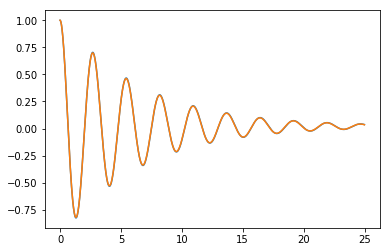

In [30]:
plt.plot(B1,A1) #Building plots to compare results
plt.plot(B1,A2)